In [11]:
import os
import pandas as pd

#database = 'a5a'
database = 'eunite2001'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Nystrom_and_SVR_eunite2001_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_eunite2001_cv_5.csv', 'Kernel_ridge_regression_eunite2001_cv_5.csv', 'Kernel_SVR_eunite2001_cv_5.csv', 'Nystrom_and_ridge_regression_eunite2001_cv_5.csv', 'Random_Fourier_features_and_SVR_eunite2001_cv_5.csv']
Ridge files
['Kernel_ridge_regression_eunite2001_cv_5.csv', 'Nystrom_and_ridge_regression_eunite2001_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_eunite2001_cv_5.csv']
SvM files
['Kernel_SVR_eunite2001_cv_5.csv', 'Nystrom_and_SVR_eunite2001_cv_5.csv', 'Random_Fourier_features_and_SVR_eunite2001_cv_5.csv']
cv_std_test_score


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,damping,File
0,100,336,0.767291,0.0,0.004631,0.0,0.802682,0.0,0.802682,0.035681,0.003329,0.000090,16568.436503,Kernel_SVR_eunite2001_cv_5.csv
1,1,3,0.457566,0.0,0.006385,0.0,0.255677,0.0,0.255677,0.070047,0.004343,0.000484,7166.169740,Nystrom_and_SVR_eunite2001_cv_5.csv
2,2,6,0.600811,0.0,0.003182,0.0,0.460294,0.0,0.460294,0.148486,0.002802,0.000170,18880.534547,Nystrom_and_SVR_eunite2001_cv_5.csv
3,4,13,0.549061,0.0,0.004456,0.0,0.763277,0.0,0.763277,0.038830,0.003472,0.000132,12321.060280,Nystrom_and_SVR_eunite2001_cv_5.csv
4,5,16,0.761849,0.0,0.008465,0.0,0.789789,0.0,0.789789,0.024912,0.006835,0.000711,9000.186991,Nystrom_and_SVR_eunite2001_cv_5.csv
5,7,23,0.763690,0.0,0.005028,0.0,0.800413,0.0,0.800413,0.037193,0.003735,0.000092,15187.995082,Nystrom_and_SVR_eunite2001_cv_5.csv
6,9,30,0.781582,0.0,0.011069,0.0,0.809021,0.0,0.809021,0.024302,0.003962,0.000100,7061.113633,Nystrom_and_SVR_eunite2001_cv_5.csv
7,10,33,0.766920,0.0,0.035698,0.0,0.798454,0.0,0.798454,0.046040,0.010480,0.011485,2148.358767,Nystrom_and_SVR_eunite2001_cv_5.csv
8,12,40,0.780584,0.0,0.032316,0.0,0.797925,0.0,0.797925,0.036656,0.005317,0.002796,2415.475194,Nystrom_and_SVR_eunite2001_cv_5.csv
9,13,43,0.775480,0.0,0.113452,0.0,0.803193,0.0,0.803193,0.033479,0.011762,0.012497,683.533374,Nystrom_and_SVR_eunite2001_cv_5.csv


In [12]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [13]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
20,Random_Fourier_features_and_ridge_regression_e...,5,0.792,16
0,Kernel_ridge_regression_eunite2001_cv_5.csv,100,0.784,336
28,Random_Fourier_features_and_ridge_regression_e...,18,0.784,60
27,Random_Fourier_features_and_ridge_regression_e...,17,0.784,57
30,Random_Fourier_features_and_ridge_regression_e...,21,0.783,70
26,Random_Fourier_features_and_ridge_regression_e...,15,0.782,50
11,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,17,0.781,57
15,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,23,0.781,77
13,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,20,0.781,67
16,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,25,0.781,84


# Damping

In [14]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
20,Random_Fourier_features_and_ridge_regression_e...,5,63150.832,16
21,Random_Fourier_features_and_ridge_regression_e...,7,59342.904,23
19,Random_Fourier_features_and_ridge_regression_e...,4,57943.476,13
23,Random_Fourier_features_and_ridge_regression_e...,10,56306.181,33
22,Random_Fourier_features_and_ridge_regression_e...,9,55275.730,30
5,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,7,47317.279,23
3,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,4,44779.282,13
6,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,9,42323.336,30
18,Random_Fourier_features_and_ridge_regression_e...,2,36926.625,6
2,Nystrom_and_ridge_regression_eunite2001_cv_5.csv,2,35683.012,6


# Plotting 
## Ridge

ehect 0    -0.151133
1     0.374099
2     0.688377
3     0.466659
4     0.746809
5     0.749354
6     0.754839
7     0.741570
8     0.741480
9     0.747032
10    0.746497
11    0.736157
12    0.744936
13    0.733926
14    0.743494
15    0.745126
Name: Mean Score in test, dtype: float64
ehect 0     0.043986
1     0.371340
2     0.663890
3     0.749389
4     0.726148
5     0.725246
6     0.736239
7     0.743313
8     0.741403
9     0.744725
10    0.747354
11    0.747318
12    0.742044
13    0.745818
14    0.731881
15    0.746324
Name: Mean Score in test, dtype: float64


KeyError: 'ridge_Mean_Score_in_test_eunite2001'

<Figure size 432x288 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

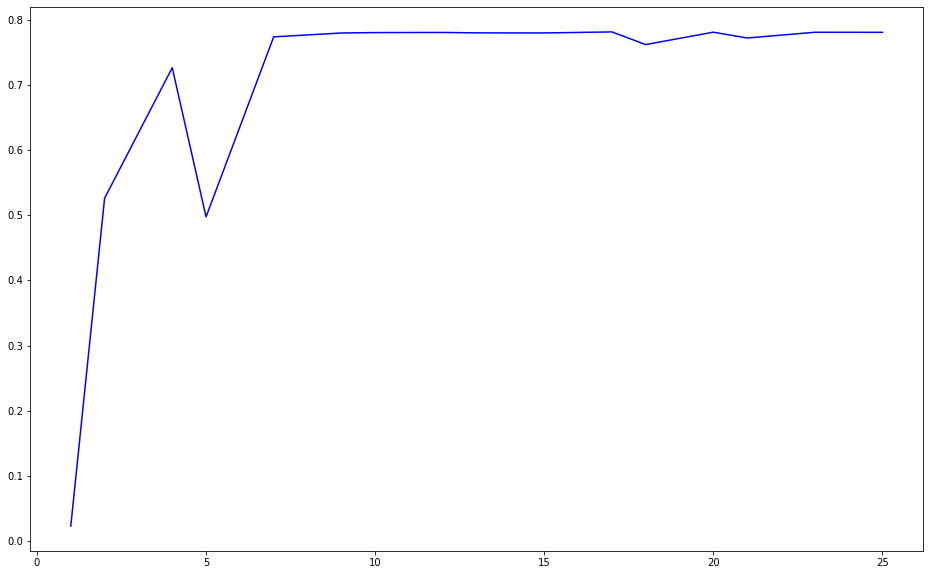

In [15]:
from plotting import view_plots_and_save_them


columns = [score_column, time_column, damping_column ]
  
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
                         std_column=std_column, type ='ridge',
                          columns=columns, database=database, plot_path = plot_path)

## SVM 

In [ ]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
                         std_column=std_column, type ='svm',
                          columns=columns, database=database, plot_path = plot_path)

# Hyperparameter

In [ ]:
print(show_verbose(svm_data_verbose, n_rows = 20))